First of all, let's import all the needed libraries.

In [81]:
import numpy as np
import matplotlib.pyplot as plt

Let's set some useful values for our experiment!

Let's define also the variables where to store our drawings.

We are going to simulate both methods:
- method 1: draw N arrival times uniformly distributed in [0, T]
- method 2: draw a set of N inter arrival times exponentially distributed in [0, T] (exponential RV of parameter  arrival_rate).

In [82]:
BINS = 100 #number of bins for histogram

arrival_rate = 5 #events per unit of time
T = 5000 #time period of interest

N = int(arrival_rate * T) #number of events in time period

repetitions = 50 #Increased for smoother histograms
#we repeat our experiment 50 times to smooth the histogram

events_uniform = []
exponential_arrival_time = []

Let's define the exponential pdf that our inter-arrival times obtained by method 1 (by computing the distance between pairs of events) should fit.

In [83]:
def exp_pdf(x, param=(arrival_rate)):
    return param * np.exp(-param * x)

#let's take some points for plotting
x_points = np.linspace(0, 5/arrival_rate, 100)
y_points = exp_pdf(x_points)

def uniform_pdf(x, params=(0, T)):
    return 1 / (params[1] - params[0])

Now let's draw our points and do our simulation.


We can see with the black lines the expected behaviour of our distribution.

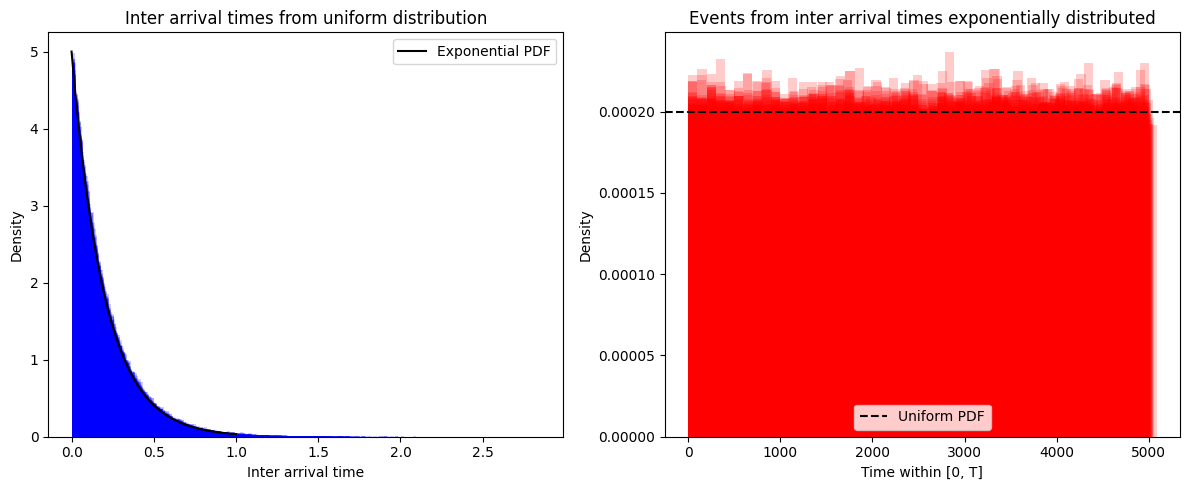

In [84]:
#define plot
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(x_points, y_points, color='black',label='Exponential PDF')
ax2.axhline(uniform_pdf(0), color='black', linestyle='--', label='Uniform PDF')

ax1.set_title('Inter arrival times from uniform distribution')
ax2.set_title('Events from inter arrival times exponentially distributed')

ax1.set_xlabel('Inter arrival time')
ax1.set_ylabel('Density')

ax2.set_xlabel('Time within [0, T]')
ax2.set_ylabel('Density')

ax1.legend()
ax2.legend()

#draw the histograms
for _ in range(repetitions):
    # Method 1: 
    events_uniform = np.random.uniform(0, T, N)
    sorted_events_uni = np.sort(events_uniform)
    inter_arrival_times = np.diff(sorted_events_uni)
    
    # Method 2: 
    exponentials = np.random.exponential(1/arrival_rate, N)
    while sum(exponential_arrival_time) > T:
        exponentials = np.random.exponential(1/arrival_rate, N)
    #S = np.sum(exponentials)
    #scaled_times = exponentials * (T / S) 
    #events_exp = np.cumsum(scaled_times)
    events_exp = np.cumsum(exponentials)
    
    ax1.hist(inter_arrival_times, bins=BINS, density=True, alpha=0.2, color='blue', histtype='stepfilled')
    ax2.hist(events_exp, bins=BINS//2, density=True, alpha=0.2, color='red', histtype='stepfilled')
    #ax1.hist(exponentials, bins=BINS, density=True, alpha=0.2, color='red', histtype='stepfilled')
    #ax2.hist(events_uniform, bins=BINS, density=True, alpha=0.2, color='blue', histtype='stepfilled')

plt.tight_layout()
plt.show()

It is important to underline that for method 2 we need to put in practice additional checks for the drawing.

In order to be sure to have events in [0, T] we discard the sampling of inter arrival times when the total time spans exceed T!

We could have done also a rescaling of the values, but then our distribution would have became distorted!

# What if N >> arrival_rate * T

In that case we are drawing *more* examples than expected. The difference is shown in the inter-arrival times, computed from the uniform distribution: our drawings are no more following the theoretical pdf.

Actually we are having an *higher* arrival rate. So the samplings will follow the distribution as it would have an higher parameter!

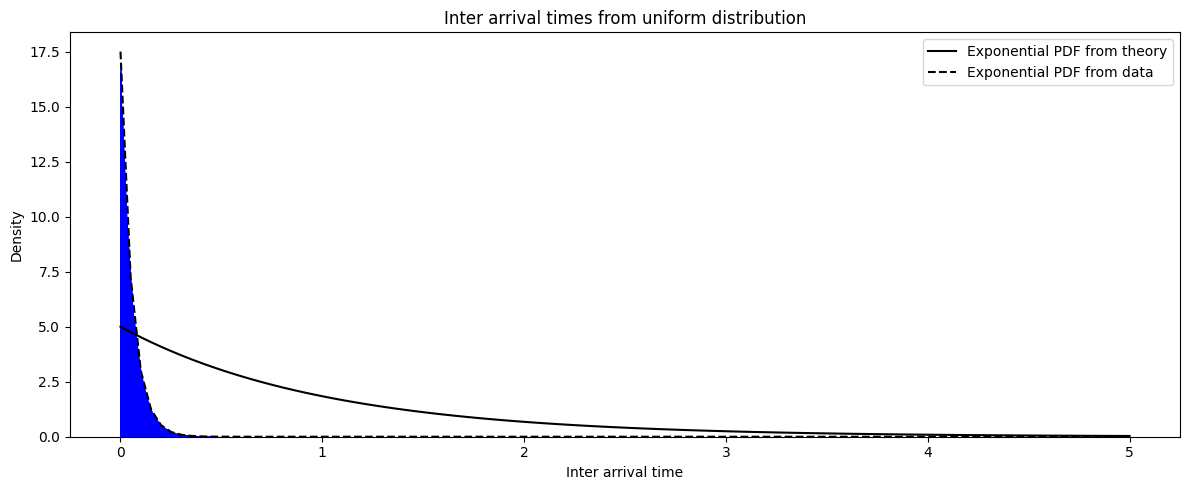

In [ ]:
N = int(arrival_rate * T*3.5) #increase number of events

#define plot
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 1, 1)

#let's take some points for plotting for the new exp pdf
ax1.plot(x_points, y_points, color='black',label='Exponential PDF from theory')
new_y_points = exp_pdf(x_points, param=(N/T))
ax1.plot(x_points, new_y_points, color='black', linestyle='--', label='Exponential PDF from data')

ax1.set_title('Inter arrival times from uniform distribution')

ax1.set_xlabel('Inter arrival time')
ax1.set_ylabel('Density')
ax1.legend()

#draw the histograms
for _ in range(repetitions):
    # Method 1: 
    events_uniform = np.random.uniform(0, T, N)
    sorted_events_uni = np.sort(events_uniform)
    inter_arrival_times = np.diff(sorted_events_uni)
        
    ax1.hist(inter_arrival_times, bins=BINS, density=True, alpha=0.2, color='blue', histtype='stepfilled')
    
plt.tight_layout()
plt.show()

From point of view of uniform distribution we have only that: we are having "more points".

# What if N << arrival_rate * T

Similar as above. In that case we are drawing *less* examples than expected. The difference is shown in the inter-arrival times, computed from the uniform distribution: our drawings are no more following the theoretical pdf.

Actually we are having a *lower* arrival rate. So the samplings will follow the distribution as it would have a lower parameter!

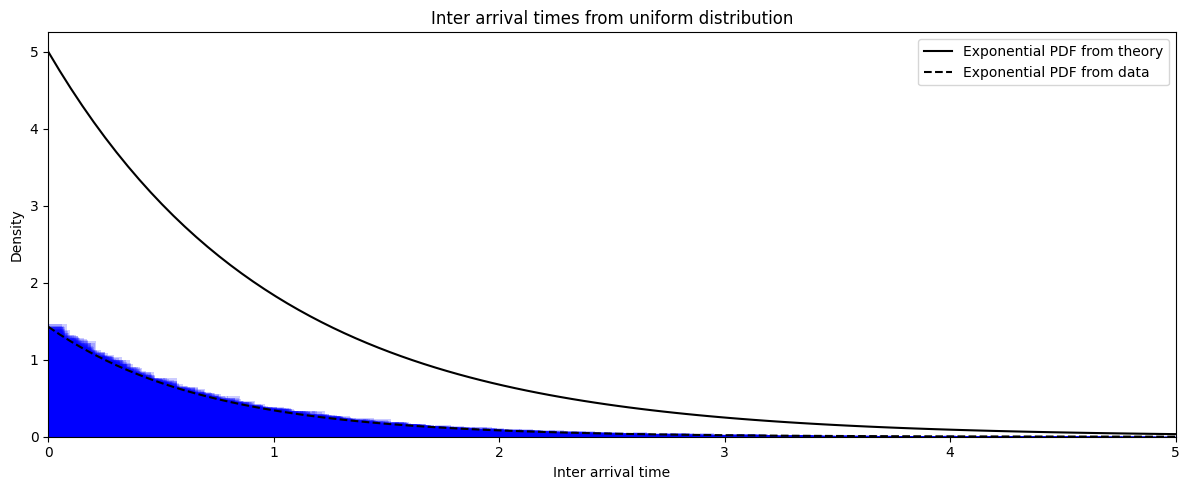

In [86]:
N = int(arrival_rate * T / 3.5) #increase number of events

#define plot
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 1, 1)

x_points = np.linspace(0, 5, 100) #it converges faster
#let's take some points for plotting for the new exp pdf
ax1.plot(x_points, y_points, color='black',label='Exponential PDF from theory')
new_y_points = exp_pdf(x_points, param=(N/T))
ax1.plot(x_points, new_y_points, color='black', linestyle='--', label='Exponential PDF from data')

ax1.set_title('Inter arrival times from uniform distribution')

ax1.set_xlabel('Inter arrival time')
ax1.set_ylabel('Density')
ax1.set_xlim(0, 5)

ax1.legend()

#draw the histograms
for _ in range(repetitions):
    # Method 1: 
    events_uniform = np.random.uniform(0, T, N)
    sorted_events_uni = np.sort(events_uniform)
    inter_arrival_times = np.diff(sorted_events_uni)
        
    ax1.hist(inter_arrival_times, bins=BINS, density=True, alpha=0.2, color='blue', histtype='stepfilled')

plt.tight_layout()
plt.show()

From point of view of uniform distribution we have only that: we are having "less points".